In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py as hdf
from IPython.display import display
from numba import jit
import shutil

In [83]:
def imp(arr):
    plt.figure(figsize=(20,15))
    plt.imshow(arr,cmap='viridis')
    plt.colorbar()
    plt.show()
    #good
def gather_universal(path: str,filetype: str)-> list:
    subdir=path

    data=[]
    for path, subdirs, files in os.walk(subdir):
        for name in files:
            if name.endswith(filetype)  :

                b=(str(os.path.join(path, name)))
                data.append(b)

                #print (str(os.path.join(path, name)))
    return data


In [84]:
#gather hdf5 files
path='data/2020-12-04_Schweißen_2'
files=pd.DataFrame(gather_universal(path,'hdf5'))
files['num']=files[0].apply(lambda x : int(x.split('.')[0].split('_')[-1]))
files.sort_values(by='num',inplace=True)
names=np.array(files[0])
display(names)

array(['data/2020-12-04_Schweißen_2\\series_step_0.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_1.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_2.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_3.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_4.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_5.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_6.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_7.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_8.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_9.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_10.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_11.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_12.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_13.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_14.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_15.hdf5',
       'data/2020-12-04_Schweißen_2\\series_step_16.hdf5',
       

In [85]:
#gather hdf5 datasets
gap=[]
for i in names:
    with hdf.File(i,'r') as r:
        gap.append(np.ndarray.flatten(np.array(r['correlation_load_series_camera_1']['camera_pos_1'],dtype=np.int32)))
#gap=[np.ndarray.flatten(np.array(hdf.File(i,'r+')['correlation_load_series_camera_1']['camera_pos_1'],dtype=np.int32))for i in names]

data=np.column_stack(gap)

interest=data#[:,40:80]
display(interest.shape)

(2004016, 152)

In [86]:
imgsize=(np.int32(1234),np.int32(1624))#interest.iloc[0,:]['data'].shape[0]/1624
display(imgsize)

(1234, 1624)

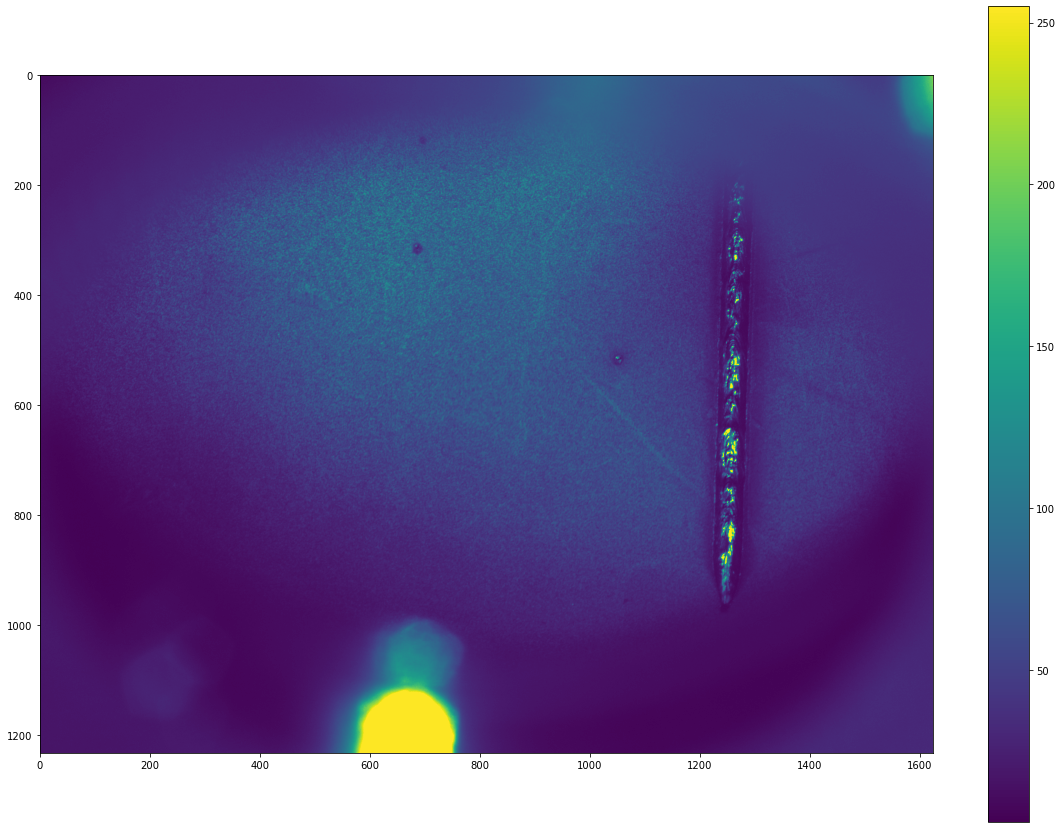

(2004016, 152)

In [87]:
before=interest.copy()
imp(before[:,0].reshape(imgsize))
display(before.shape)


In [88]:
#median anpassen
@jit(nopython=True)
def iron (arr):

    thresh=np.int32(5)
    #plt.plot(arr)
    b=arr.copy()
    med=np.median(arr[:20])
    for i in range(len(b)):

        if (b[i]-med)>thresh:
            b[i]=b[i-1]
    return (b)

#print(len(before))

@jit(nopython=True)
def after_getter(before):
    after=before.copy()
    for i in range(len(after)):
        after[i]=iron(before[i])
    return(after)

after=after_getter(before)


(2004016, 152)

(2004016, 152)

'--------------------------------'

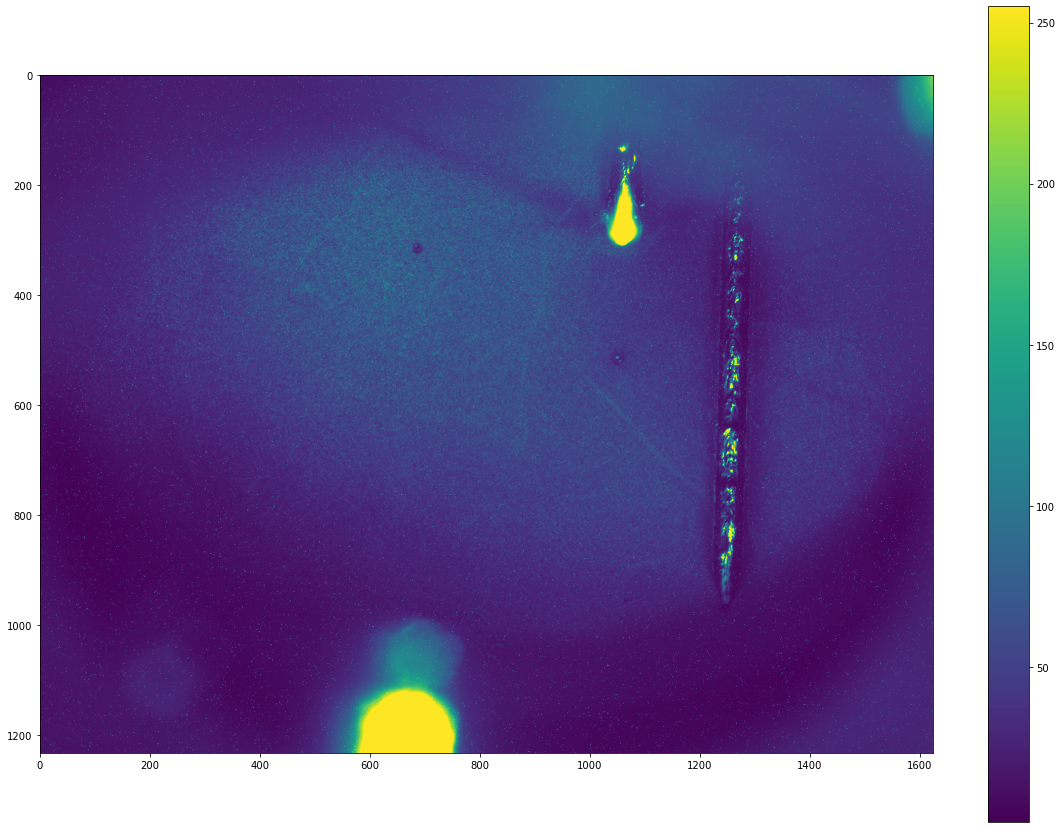

'++++++++++++++++++++++++++++++++'

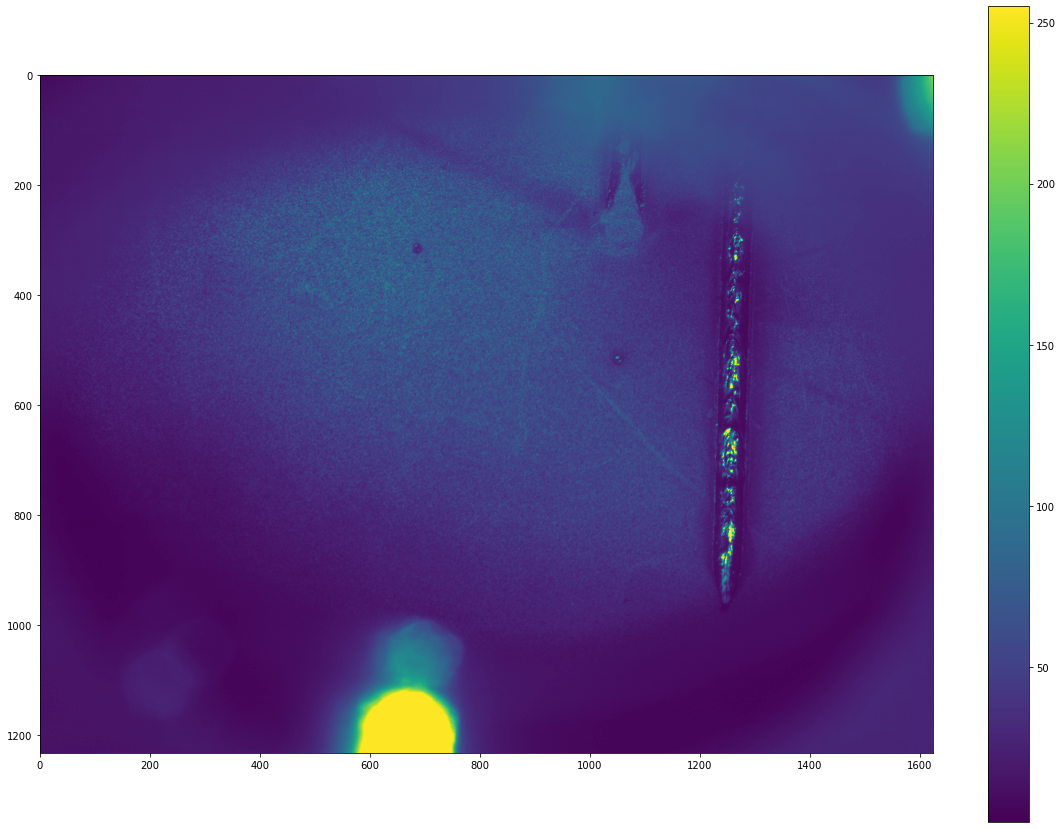

In [89]:
display(before.shape,after.shape)
def testview(start,end):
    for i in range(start,end):
        display('--------------------------------')
        old=before[:,i].reshape(imgsize)
        imp(old)
        display('++++++++++++++++++++++++++++++++')
        new=after[:,i].reshape(imgsize)
        imp(new)
testview(50,51)


In [90]:
display('after {}'.format(after.shape))

'after (2004016, 152)'

In [91]:
def get_attrs(path):

    values=[]
    with hdf.File(path,'r') as f:
        keys=list(f['correlation_load_series_camera_1']['camera_pos_1'].attrs.keys())
        for i in keys:
            values.append(f['correlation_load_series_camera_1']['camera_pos_1'].attrs[i])
    return(keys,values)
#display(get_attrs('data/2020-12-04_Schweißen_2/series_step_55.hdf5'))
def get_analog_attrs(path):

    values=[]
    with hdf.File(path,'r') as f:
        keys=list(f['correlation_load_series_camera_1']['analog_channels'].attrs.keys())
        for i in keys:
            values.append(f['correlation_load_series_camera_1']['analog_channels'].attrs[i])
    return(keys,values)

In [92]:
exportpath=path+'/export'
os.makedirs(exportpath, exist_ok=True)
for i in names:
    shutil.copy(i, exportpath)

In [93]:
# sortexportfiles and create right order
exportfiles=pd.DataFrame(gather_universal(exportpath,'hdf5'))
exportfiles['num']=exportfiles[0].apply(lambda x : int(x.split('.')[0].split('_')[-1]))
exportfiles.sort_values(by='num',inplace=True)
exportnames=np.array(exportfiles[0])
display(exportnames)

array(['data/2020-12-04_Schweißen_2/export\\series_step_0.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_1.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_2.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_3.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_4.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_5.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_6.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_7.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_8.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_9.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_10.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_11.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_12.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_13.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_14.hdf5',
       'data/2020-12

array(['data/2020-12-04_Schweißen_2/export\\series_step_0.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_1.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_2.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_3.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_4.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_5.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_6.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_7.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_8.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_9.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_10.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_11.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_12.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_13.hdf5',
       'data/2020-12-04_Schweißen_2/export\\series_step_14.hdf5',
       'data/2020-12

(2004016, 152)

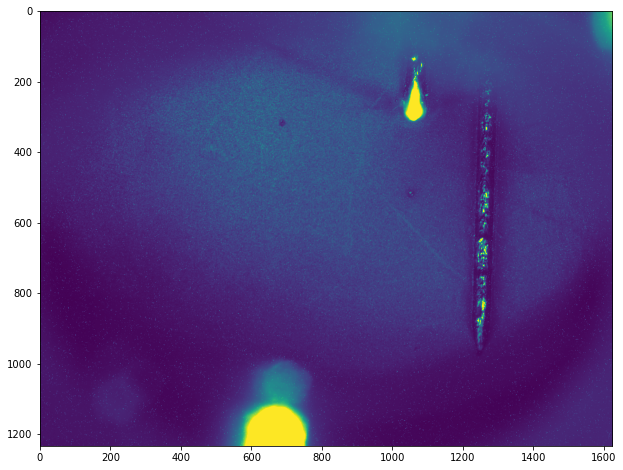

In [94]:
# test before export
display(exportnames)
display(after.shape)
with hdf.File(exportnames[50],'r') as r:
    plt.figure(figsize=(20,8))
    plt.imshow(np.array(r['correlation_load_series_camera_1']['camera_pos_1']))
    plt.show()

In [95]:
#export routine
for i in range(len(after[0,:])):
    res=after[:,i].reshape(1234, 1624).copy()
    with hdf.File(exportnames[i],'r+') as r:
        display(exportnames[i])


        r['correlation_load_series_camera_1']['camera_pos_1'][:,:]=res


'data/2020-12-04_Schweißen_2/export\\series_step_0.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_1.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_2.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_3.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_4.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_5.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_6.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_7.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_8.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_9.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_10.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_11.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_12.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_13.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_14.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_15.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_16.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_17.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_18.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_19.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_20.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_21.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_22.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_23.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_24.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_25.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_26.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_27.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_28.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_29.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_30.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_31.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_32.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_33.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_34.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_35.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_36.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_37.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_38.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_39.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_40.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_41.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_42.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_43.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_44.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_45.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_46.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_47.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_48.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_49.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_50.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_51.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_52.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_53.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_54.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_55.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_56.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_57.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_58.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_59.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_60.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_61.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_62.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_63.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_64.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_65.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_66.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_67.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_68.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_69.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_70.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_71.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_72.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_73.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_74.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_75.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_76.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_77.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_78.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_79.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_80.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_81.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_82.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_83.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_84.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_85.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_86.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_87.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_88.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_89.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_90.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_91.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_92.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_93.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_94.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_95.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_96.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_97.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_98.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_99.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_100.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_101.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_102.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_103.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_104.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_105.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_106.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_107.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_108.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_109.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_110.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_111.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_112.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_113.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_114.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_115.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_116.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_117.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_118.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_119.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_120.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_121.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_122.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_123.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_124.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_125.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_126.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_127.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_128.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_129.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_130.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_131.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_132.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_133.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_134.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_135.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_136.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_137.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_138.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_139.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_140.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_141.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_142.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_143.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_144.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_145.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_146.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_147.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_148.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_149.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_150.hdf5'

'data/2020-12-04_Schweißen_2/export\\series_step_151.hdf5'

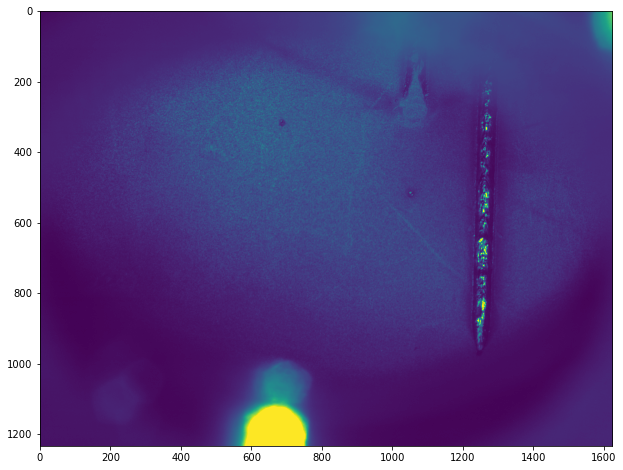

In [96]:
# test after export
with hdf.File(exportnames[50],'r') as r:
    plt.figure(figsize=(20,8))
    plt.imshow(np.array(r['correlation_load_series_camera_1']['camera_pos_1']))
    plt.show()